In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [3]:
# Loading the New Customer Data from the excel file

new_cust = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')

In [4]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [5]:
# Checking first 5 records from New Customer Data

new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


The data-types of the feature columns are fine. However 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

### Total Records

In [6]:
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


### Numeric Columns and Non-Numeric Columns

In [7]:
# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


### Dropping Irrelevent Columns

 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

In [8]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

### Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [9]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

### 1. Last Name

Lets check where Last name is absent, is first name absent aswell.

In [10]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None"

In [11]:
new_cust['last_name'].fillna('None',axis=0, inplace=True)

In [12]:
 new_cust['last_name'].isnull().sum()

0

Currently there are no missing values for Last Name column

### 2. Date of Birth

In [13]:
round(new_cust['DOB'].isnull().mean()*100)

2

Less than 5 % of data has null date of birth. we can remove the records where date of birth is null

In [14]:
# Fetching the index of the records / rows where the DOB is null.

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index


In [15]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)

In [16]:
new_cust['DOB'].isnull().sum()

0

Currently there are no missing values for DOB.

#### Creating Age Column for checking further descripency in data

In [17]:
# Converting the "DOB" column to a datetime format 
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])

# To Calculate the current date or a reference date for calculating the age
reference_date = pd.to_datetime('2024-04-23')

# To Calculate the age based on the exact date of birth and the reference date
new_cust['Age'] = (reference_date - new_cust['DOB']).dt.days // 365


new_cust['Age']

0      66
1      54
2      49
3      45
4      58
       ..
995    64
996    22
997    69
998    71
999    68
Name: Age, Length: 983, dtype: int64

In [18]:
new_cust['Age'].describe()

count    983.000000
mean      52.550356
std       17.061864
min       22.000000
25%       40.500000
50%       52.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x800 with 0 Axes>

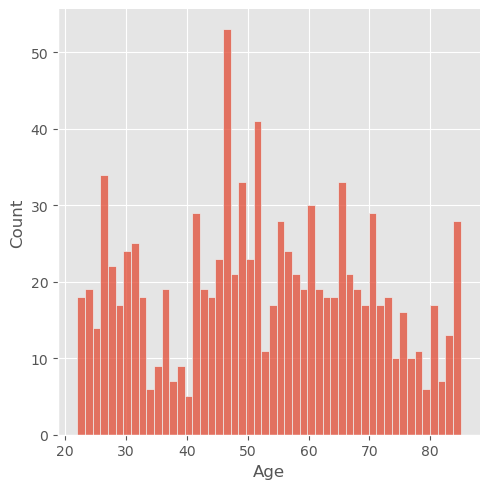

In [19]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.displot(new_cust['Age'], kde=False, bins=50)

Looking at the age field there is no descripency in the data

#### Creating Age Group Column

In [20]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

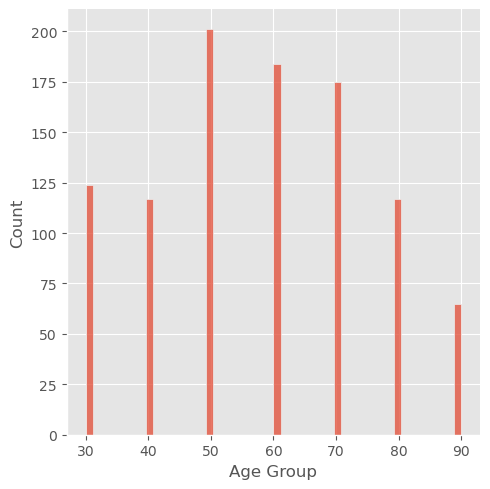

In [21]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.displot(new_cust['Age Group'], kde=False, bins=50)


### 3. Job Title

In [22]:
round(new_cust['job_title'].isnull().mean()*100)

11

Since percentage of missing values for Job Title is 11%. We will replace null values with Missing

In [23]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)

In [24]:
new_cust['job_title'].isnull().sum()

0

### 4. Job Industry category

In [25]:
round(new_cust['job_industry_category'].isnull().mean()*100)

17

Since Percentage of missing Job Industry Category is 17%. We will replace null values with Missing.

In [27]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)


In [28]:
new_cust['job_industry_category'].isnull().sum()

0

Currently there are no Missing values for Job Industry Category column.

In [29]:
new_cust.isnull().sum()


first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

##### Finally there are no Missing Values in the dataset.


In [30]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))

Total records after removing Missing Values: 983


## Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

### 1.Gender

In [31]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

There is no inconsistent data in gender column.

### 2. Wealth Segment

In [32]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

There is no inconsistent data in wealth_segment column.

 ### 3.Deceased Indicator

In [33]:
new_cust['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

There is no inconsistent data in deceased_indicator column

### 4. Owns a Car

In [34]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

There is no inconsistent data in owns_car column.

### 5. State

In [35]:
new_cust['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

There is no inconsistent data in state column.

### 6. Country

In [36]:
new_cust['country'].value_counts()


country
Australia    983
Name: count, dtype: int64

There is no inconsistent data in country column.

### 7. Postcode

In [37]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


There is no inconsistent data in postcode column.

### 8. Address

In [38]:
new_cust[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


There is no inconsistent data in address column.

### 9.Tenure

In [39]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x800 with 0 Axes>

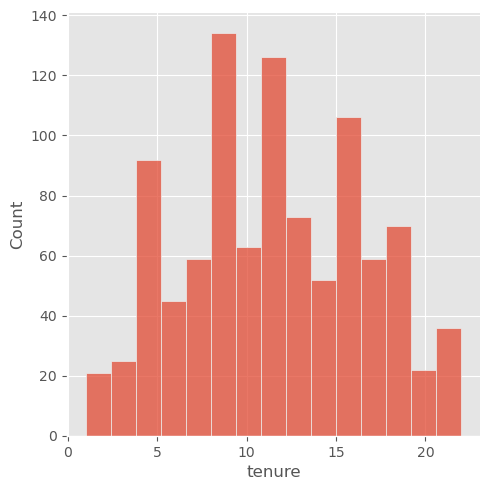

In [41]:
# Distributon of tenure

plt.figure(figsize=(15,8))
sns.displot(new_cust['tenure'])

There is no inconsistent data in tenure column. The distribution of tenure looks fine.

## Duplication Checks

In [42]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


since both the numbers are same. There are no duplicate records in the dataset.

## Exporting the Cleaned New Customers Data Set to csv

In [43]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)